In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./input/train_V2.csv', header=0)
df.shape

(4446966, 29)

In [3]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


count    4.446965e+06
mean     4.728216e-01
std      3.074050e-01
min      0.000000e+00
25%      2.000000e-01
50%      4.583000e-01
75%      7.407000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64


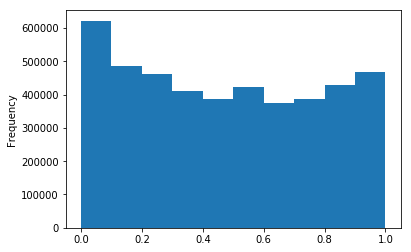

In [5]:
# distribution of target
print(df['winPlacePerc'].describe())
df['winPlacePerc'].plot.hist()

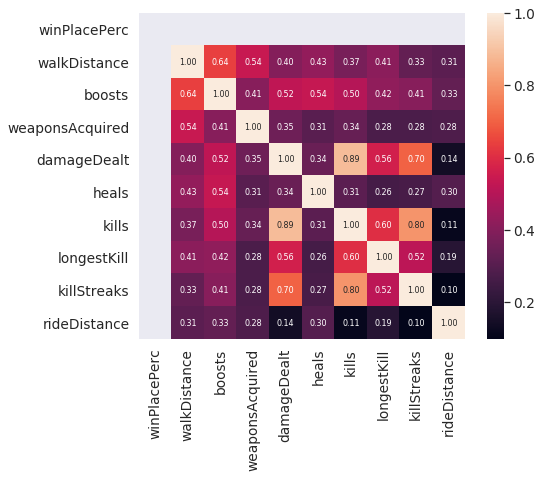

In [6]:
#winPlacePerc correlation matrix
k = 10 #number of variables for heatmap
corrmat = df.corr() 
cols = corrmat.nlargest(k, 'winPlacePerc').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(df[cols].values.T) # correlation 
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We know that some features should strongly relate to the winPlace. Check the distribution of them and remove outliers.

(0, 200]        2247764
(200, 400]       656877
(400, 600]       198083
(600, 800]        66593
(800, 1000]       23757
(1000, 1200]       8770
(1200, 1400]       3643
(1400, 1600]       1592
(1600, 1800]        732
(1800, 2000]        401
(2000, 2200]        223
(2200, 2400]        142
(2400, 2600]         84
(2600, 2800]         56
(2800, 3000]         38
(3000, 3200]         34
(3600, 3800]         13
(3200, 3400]         13
(3400, 3600]         12
(3800, 4000]          5
Name: damageDealt, dtype: int64


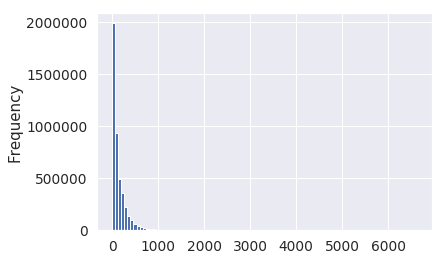

In [7]:
# distribution of damageDealt
# outliers with large value exist, see the detail distribution
dist = pd.cut(df['damageDealt'],bins=[r for r in range(0,4001,200)])
print(dist.value_counts())
# most of damageDealt are in 0-2000
df['damageDealt'].plot.hist(bins=100)

(0, 5]      1824106
(5, 10]       84798
(10, 15]       6932
(15, 20]        945
(20, 25]        265
(25, 30]         96
(30, 35]         41
(35, 40]         28
(40, 45]         14
(45, 50]          6
Name: kills, dtype: int64


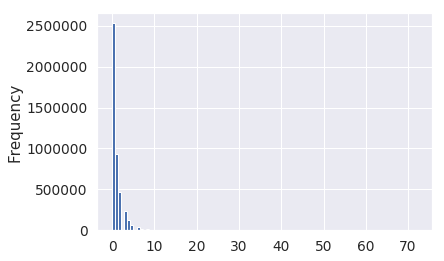

In [8]:
# distribution of kills
# outliers with large value exist, see the detail distribution
dist = pd.cut(df['kills'],bins=[r for r in range(0,51,5)])
print(dist.value_counts())
# most of kills are in 0-20
df['kills'].plot.hist(bins=100)

(0, 5]      747642
(5, 10]       2920
(10, 15]       226
(15, 20]        41
(30, 35]         5
(25, 30]         5
(20, 25]         5
(40, 45]         2
(35, 40]         2
(45, 50]         1
Name: headshotKills, dtype: int64


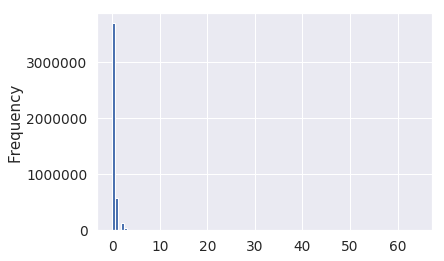

In [9]:
# distribution of headshotKills
dist = pd.cut(df['headshotKills'],bins=[r for r in range(0,51,5)])
print(dist.value_counts())
# most of headshotKills are in 0-10
df['headshotKills'].plot.hist(bins=100)

(0, 5]      1642075
(5, 10]       29038
(10, 15]       1698
(15, 20]        295
(20, 25]         84
(25, 30]         22
(30, 35]         14
(35, 40]          4
(45, 50]          0
(40, 45]          0
Name: DBNOs, dtype: int64


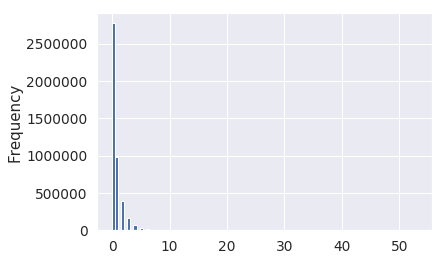

In [10]:
# distribution of DBNOs
dist = pd.cut(df['DBNOs'],bins=[r for r in range(0,51,5)])
print(dist.value_counts())
# most of DBNOs are in 0-15
df['DBNOs'].plot.hist(bins=100)

(0, 2]      1864904
(2, 4]        51669
(4, 6]          535
(6, 8]           86
(8, 10]          27
(10, 12]         13
(12, 14]          7
(18, 20]          1
(16, 18]          1
(14, 16]          1
(22, 24]          0
(20, 22]          0
Name: killStreaks, dtype: int64


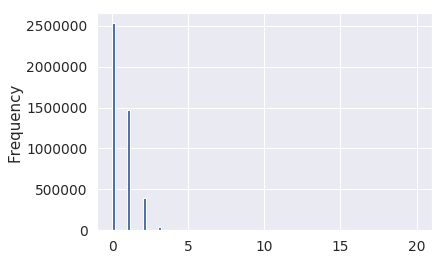

In [11]:
# distribution of killStreaks
dist = pd.cut(df['killStreaks'],bins=[r for r in range(0,25,2)])
print(dist.value_counts())
# most of killStreaks are in 0-8
df['killStreaks'].plot.hist(bins=100)

(0, 5]      777549
(5, 10]       1680
(10, 15]        72
(15, 20]         3
(20, 25]         2
(35, 40]         0
(30, 35]         0
(25, 30]         0
Name: assists, dtype: int64


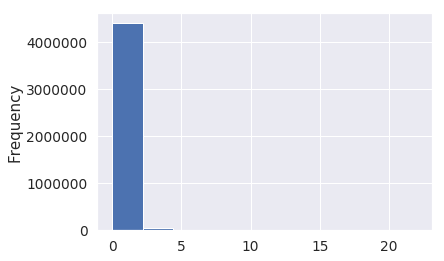

In [12]:
# distribution of assists
dist = pd.cut(df['assists'],bins=[r for r in range(0,41,5)])
print(dist.value_counts())
# most of assists are in 0-10
df['assists'].plot.hist(bins=10)

In [13]:
# remove outliers
df = df[
    (df.killStreaks < 9) & (df.assists < 11) & (df.headshotKills < 11) & (df.DBNOs < 16) & (df.damageDealt <= 2000) & (
        df.kills < 21)]
df.shape
# we remove more than 1000 outliers

(4445844, 29)

Check the relationships between other features and the winPlcae

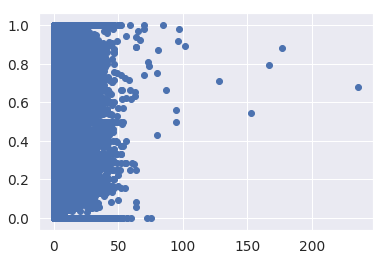

In [14]:
# scatter plot of weaponsAcquired and winPlacePerc, the relationship between them seems not very strong.
plt.scatter(df['weaponsAcquired'],df['winPlacePerc'])

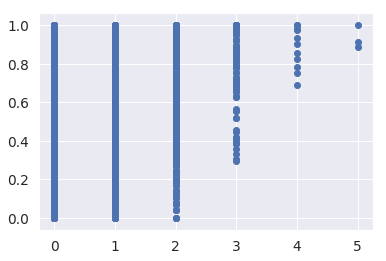

In [15]:
# scatter plot of vehicleDestroys and winPlacePerc
plt.scatter(df['vehicleDestroys'],df['winPlacePerc'])

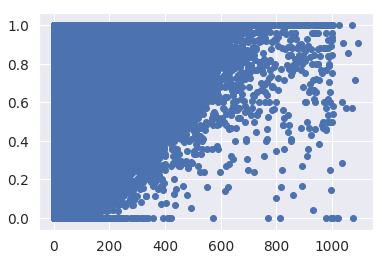

In [16]:
# scatter plot of longestKill and winPlacePerc
plt.scatter(df['longestKill'],df['winPlacePerc'])

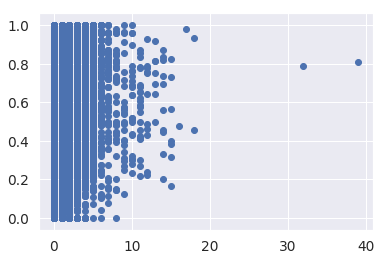

In [17]:
plt.scatter(df['revives'],df['winPlacePerc'])

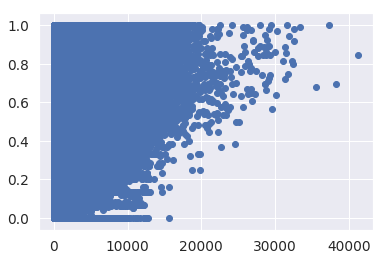

In [18]:
# use total distance
df['total_distance'] = df['swimDistance'] + df['walkDistance'] + df['rideDistance']
plt.scatter(df['total_distance'],df['winPlacePerc'])

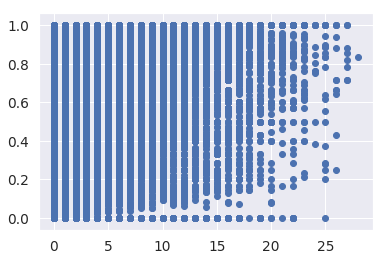

In [19]:
df['kill_and_assist'] = df['kills'] + df['assists']
plt.scatter(df['kill_and_assist'],df['winPlacePerc'])

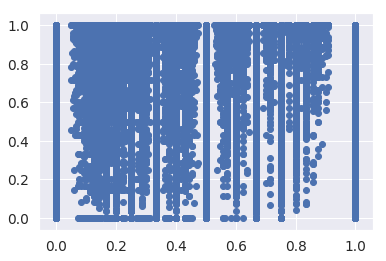

In [20]:
df['headshot_rate'] = df['headshotKills'] / df['kills']
df['headshot_rate'].fillna(0, inplace=True)
plt.scatter(df['headshot_rate'],df['winPlacePerc'])

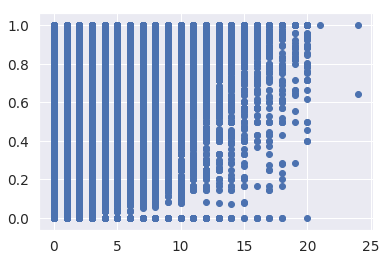

In [21]:
df['total_kills'] = df['kills'] + df['roadKills']
plt.scatter(df['total_kills'],df['winPlacePerc'])

We see the relationships between personal data and the winPlace. Let's consider the overall performance and the average of a match.

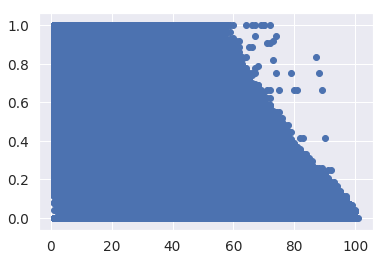

In [22]:
plt.scatter(df['killPlace'],df['winPlacePerc'])